In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
# Read csv
salaries_df = pd.read_csv('../Resources/Data_Science_Salaries_Clean.csv')

In [3]:
# Preview dataframe
salaries_df.head(10)

,Unnamed: 0,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023
5,5,Data Scientist,Full-Time,Senior,Expert,126000,United States Dollar,United States,126000,United States,Medium,2023
6,6,Data Scientist,Full-Time,Senior,Expert,170000,United States Dollar,United States,170000,United States,Medium,2023
7,7,Data Scientist,Full-Time,Senior,Expert,130000,United States Dollar,United States,130000,United States,Medium,2023
8,8,Data Engineer,Full-Time,Mid,Intermediate,85000,British Pound Sterling,United Kingdom,104584,United Kingdom,Medium,2023
9,9,Data Engineer,Full-Time,Mid,Intermediate,75000,British Pound Sterling,United Kingdom,92280,United Kingdom,Medium,2023


In [4]:
# List of job titles
salaries_df.value_counts("Job Title")

Job Title
Data Engineer                702
Data Scientist               635
Data Analyst                 459
Machine Learning Engineer    300
Analytics Engineer           132
dtype: int64

In [5]:
# Count of job titles
unique_job_title_count = len(salaries_df["Job Title"].unique())
unique_job_title_count

5

In [6]:
# List of countries
countries = salaries_df["Company Location"].unique()
countries

array(['United States', 'United Kingdom', 'Germany', 'Sweden', 'Spain',
       'Estonia', 'Philippines', 'Canada', 'Australia', 'Andorra',
       'France', 'Netherlands', 'Ecuador', 'Portugal', 'Colombia',
       'Norway', 'Argentina', 'India', 'Nigeria', 'Hong Kong',
       'Switzerland', 'Central African Republic', 'Ireland', 'Slovenia',
       'Mexico', 'Croatia', 'Brazil', 'Armenia', 'Latvia', 'Romania',
       'Thailand', 'Lithuania', 'Iran, Islamic Republic of', 'Hungary',
       'Puerto Rico', 'Finland', 'Greece', 'Belgium', 'Indonesia',
       'Turkey', 'Singapore', 'Italy', 'United Arab Emirates', 'Malaysia',
       'Poland', 'Algeria', 'Austria', 'Chile', 'Japan', 'Luxembourg',
       'Israel', 'Malta'], dtype=object)

In [7]:
# Empty list to hold countries for comparison
countries_to_compare = []

# Loop through all countries 
for country in countries:
    
    # Get the unique job titles for each country
    country_job_titles = salaries_df[salaries_df["Company Location"] == country]["Job Title"].unique()
    
    # Get the number of job titles for each country
    count = len(country_job_titles)
    
    # If the country has all 5 job titles...
    if count == unique_job_title_count:
        # Add the country to the list to compare
        countries_to_compare.append(country)

print(countries_to_compare)

['United States', 'United Kingdom', 'Canada']


In [8]:
# Filter base data frame for only countries in our list to compare
filtered_countries_df = salaries_df[salaries_df['Company Location'].isin(countries_to_compare)]

# Number of records for each country
filtered_countries_df.value_counts("Company Location")

Company Location
United States     1717
United Kingdom     187
Canada              65
dtype: int64

In [9]:
# Group the filtered dataframe by country and job type to get the median salary
grouped_by_country = filtered_countries_df.groupby(["Company Location", "Job Title"])
median_by_country = grouped_by_country["Salary in USD"].median()
median_by_country

Company Location  Job Title                
Canada            Analytics Engineer           112000.0
                  Data Analyst                  92500.0
                  Data Engineer                141200.0
                  Data Scientist               143100.0
                  Machine Learning Engineer    128050.0
United Kingdom    Analytics Engineer           115050.0
                  Data Analyst                  81800.0
                  Data Engineer                 86193.0
                  Data Scientist               102200.0
                  Machine Learning Engineer    103577.5
United States     Analytics Engineer           152500.0
                  Data Analyst                 112900.0
                  Data Engineer                151625.0
                  Data Scientist               154000.0
                  Machine Learning Engineer    180000.0
Name: Salary in USD, dtype: float64

In [10]:
# Set function to hold a list of median salaries for each country to put into summary dataframe
def country_total (country, df=median_by_country):
    totals = []
    for i in range(5):
        totals.append(df[country][i])
    return totals

# Get median salaries for each country
canada = country_total("Canada")
united_kingdom = country_total("United Kingdom")
united_states = country_total("United States")

# Get new data frame for visualizations
median_by_country_df = pd.DataFrame({"Job Title": ["Analytics Engineer", "Data Analyst",
                                           "Data Engineer", "Data Scientist", 
                                           "Machine Learning Engineer"],
                            "Canada": canada,
                            "United Kingdom": united_kingdom,
                            "United States": united_states}).set_index("Job Title")

# Show data frame
median_by_country_df

,Canada,United Kingdom,United States
Job Title,,,
Analytics Engineer,112000.0,115050.0,152500.0
Data Analyst,92500.0,81800.0,112900.0
Data Engineer,141200.0,86193.0,151625.0
Data Scientist,143100.0,102200.0,154000.0
Machine Learning Engineer,128050.0,103577.5,180000.0


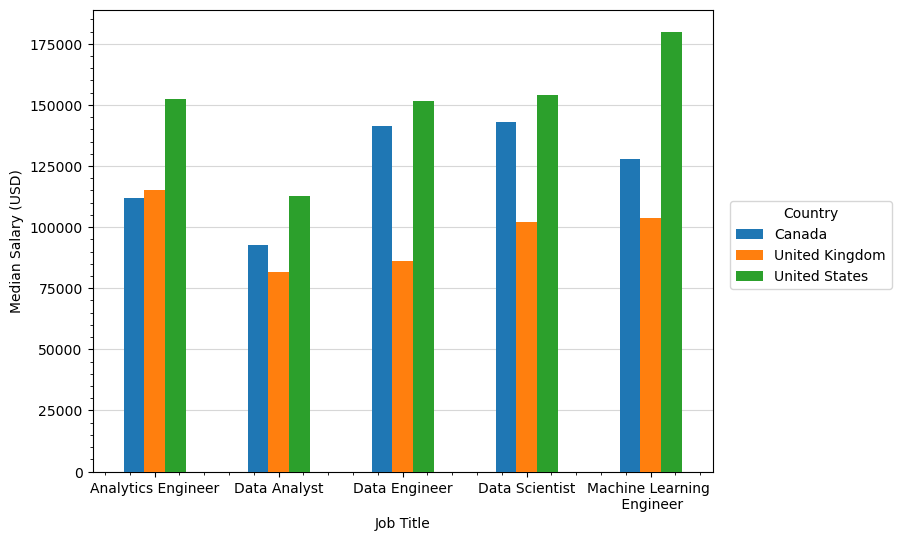

In [11]:
# Plot data
median_by_country_df.plot(kind='bar', figsize=(8,6), zorder=3)
plt.xticks(rotation=0, ticks=[0, 1, 2, 3, 4],labels=["Analytics Engineer", "Data Analyst", 
                                                     "Data Engineer", "Data Scientist", 
                                                     "Machine Learning \n Engineer"])
plt.grid(axis="y", alpha=0.5, zorder=0)
plt.minorticks_on()
plt.ylabel("Median Salary (USD)")
plt.legend(fontsize="medium", title="Country", bbox_to_anchor=(1.3,0.6))
plt.savefig("output_data/fig1.png")
plt.show()

In [12]:
# Alternate example grouped by job title
median_by_job_title_df = median_by_country_df.T
median_by_job_title_df.head()

Job Title,Analytics Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer
Canada,112000.0,92500.0,141200.0,143100.0,128050.0
United Kingdom,115050.0,81800.0,86193.0,102200.0,103577.5
United States,152500.0,112900.0,151625.0,154000.0,180000.0


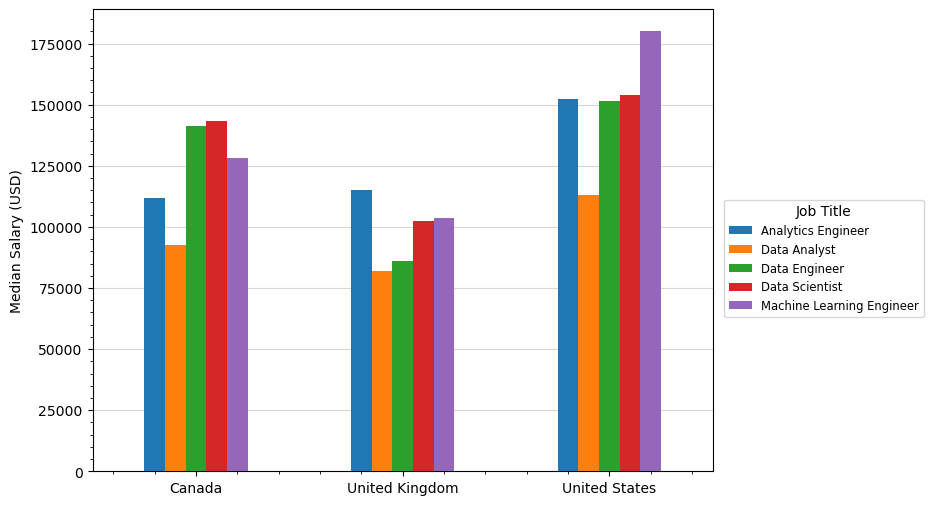

In [13]:
# Show plot
median_by_job_title_df.plot(kind='bar', figsize=(8,6), zorder=3)
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.5, zorder=0)
plt.minorticks_on()
plt.ylabel("Median Salary (USD)")
plt.legend(fontsize="small", title="Job Title", bbox_to_anchor=(1.35,0.6))
plt.savefig("output_data/fig2.png")
plt.show()

In [14]:
# Group the filtered dataframe by country and job type to get the count for each job title 
count_by_country = filtered_countries_df.groupby(["Company Location", "Job Title"])
count_by_country = count_by_country["Job Title"].count()
count_by_country

Company Location  Job Title                
Canada            Analytics Engineer             2
                  Data Analyst                  16
                  Data Engineer                 12
                  Data Scientist                27
                  Machine Learning Engineer      8
United Kingdom    Analytics Engineer            18
                  Data Analyst                  41
                  Data Engineer                 55
                  Data Scientist                45
                  Machine Learning Engineer     28
United States     Analytics Engineer           109
                  Data Analyst                 363
                  Data Engineer                558
                  Data Scientist               470
                  Machine Learning Engineer    217
Name: Job Title, dtype: int64

In [15]:
# Get counts for each country
canada_counts = count_by_country["Canada"]
uk_counts = count_by_country["United Kingdom"]
us_counts = count_by_country["United States"]

In [16]:
# Define function for pie chart
def pie_chart(country:str, df=count_by_country):
    counts = df[country]
    counts.plot(kind="pie", title=(f"Job Comparison for {country}"))
    plt.axis("equal")
    plt.show()

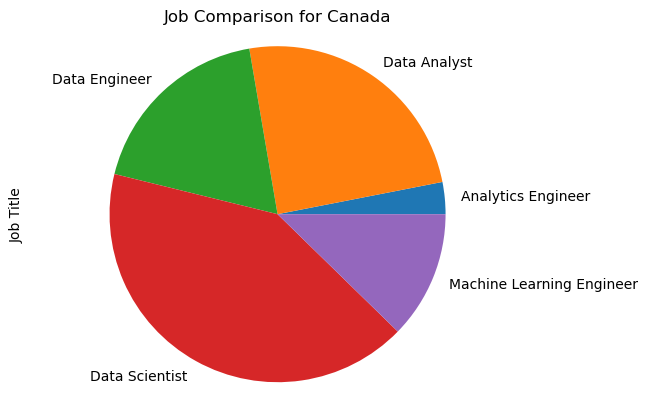

In [17]:
# Chart for Canada
pie_chart("Canada")

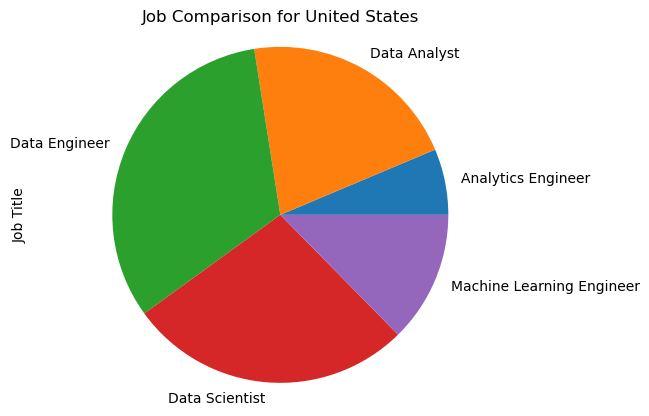

In [18]:
# Chart for United States
pie_chart("United States")

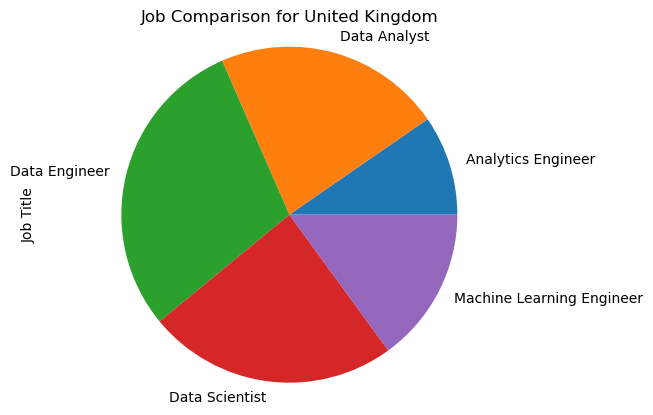

In [19]:
# Chart for United Kingdom
pie_chart("United Kingdom")